## Question 12

In [1]:
# importing required packages for data manipulation

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv('energydata_complete.csv')
df.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


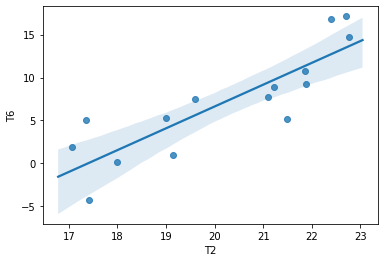

In [3]:
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)

#regression plot
sns.regplot(x="T2", y="T6", data=simple_linear_reg_df)

In [5]:
# dropping the lights column
df.drop(['lights'], axis=1, inplace=True)

In [7]:
# dropping the date column
df.drop(['date'], axis=1, inplace=True)

In [8]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['T2', 'T6'])
temp_target = normalised_df['T6']


#Now, we split our dataset into the training and testing dataset. 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, temp_target, test_size=0.3, random_state=1)

linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

What is the R^2 value in two D.P?

In [9]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.968

The R^2 value in two D.P IS 0.97

## Question 13

What is the Mean Absolute Error (in two decimal places)?

In [12]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.02

The Mean Absolute Error in two DP is 0.02

## Question 14
What is the Residual Sum of Squares (in two decimal places)?

In [13]:
import numpy as np

rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

5.99

The Residual Sum of Squares is 5.99

## Question 15
What is the Root Mean Squared Error (in three decimal places)?

In [14]:
from sklearn.metrics import  mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.032

The Root Mean Squared Error is 0.032

## Question 17

Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [15]:
df.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


 Feature Mean Tempearture - Temperature inside the house varies between 39.24 Deg celcius & 41.55 Deg celscius.

## Question 18

Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [16]:
#checking of Ridge regularisation

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [17]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')

In [18]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')

In [19]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight
0,RH_2,-0.247099,-0.249343
1,RH_6,-0.103709,-0.100809
2,Tdewpoint,-0.087800,-0.002150
3,T5,-0.073698,-0.069264
4,RH_8,-0.065632,-0.062919
5,T7,-0.065628,-0.063546
6,T8,-0.053442,-0.055797
7,T1,-0.048806,-0.047741
8,RH_3,-0.047302,-0.045037
9,Press_mm_hg,-0.024352,-0.025367


## Question 19

Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [20]:
#checking of Lasso regularisation

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [21]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Lasso_weight
0,RH_2,-0.247099,-0.000000
1,RH_6,-0.103709,-0.056987
2,Tdewpoint,-0.087800,0.038123
3,T5,-0.073698,-0.000000
4,RH_8,-0.065632,0.000000
5,T7,-0.065628,-0.000000
6,T8,-0.053442,-0.000000
7,T1,-0.048806,-0.000000
8,RH_3,-0.047302,0.000000
9,Press_mm_hg,-0.024352,-0.000000


## Question 20

What is the new RMSE with the Lasso Regression (in 3 decimal places)? 

In [22]:
from sklearn.metrics import  mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.032